In [28]:
import numpy as np
from utils import load_data, supervised_samples

In [2]:
X_full, y_full, X_test, y_test, classes = load_data()

In [3]:
# Distance functions

def distance(p1, p2, metric='euclidean', p=2):
    if metric == 'euclidean':
        return np.sqrt(np.sum((p1-p2)**2))
    elif metric == 'manhattan':
        return np.sum(np.abs(p1 - p2))
    elif metric == 'chebyshev':
        return np.max(np.abs(p1 - p2))
    elif metric == 'minkowski':
        return np.sum(np.abs(p1 - p2)**p)**(1/p)

In [4]:
class Model:
    def __init__(self, X_train, y_train, metric='euclidean', k=1):
        self.X_train = X_train
        self.y_train = y_train
        self.metric = metric
        self.k = k
    
    def evaluate(self, test_point):
        distances = []
    
        for data_point, label in zip(self.X_train, self.y_train):
            distances.append((distance(test_point, data_point, self.metric), label))
        
        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest_neighbors = np.array(sorted_distances[:self.k])
        
        freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
        labels, counts = freq
        majority_vote = labels[counts.argmax()]

        return majority_vote

    def calculate_accuracy(self, X_test, y_test):
        predictions = []
    
        for test_point in X_test:
            pred_label = self.evaluate(test_point)
            predictions.append(pred_label)
        
        predictions = np.array(predictions)
        
        accuracy = (predictions == y_test).sum() / y_test.shape[0]
        return accuracy

In [5]:
class Model_with_weights:
    def __init__(self, X_train, y_train, metric='euclidean', k=1):
        self.X_train = X_train
        self.y_train = y_train
        self.metric = metric
        self.k = k
    
    def evaluate(self, test_point):
        distances = []
    
        for data_point, label in zip(self.X_train, self.y_train):
            distances.append((distance(test_point, data_point, self.metric), label))
        
        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest_neighbors = np.array(sorted_distances[:self.k])

        # Weighting
        weights = 1 / k_nearest_neighbors[:, 0]  
        labels = k_nearest_neighbors[:, 1]

        unique_labels, counts = np.unique(labels, return_counts=True)
        weighted_counts = np.zeros_like(counts, dtype=float)
        for i, label in enumerate(unique_labels):
            weighted_counts[i] = np.sum(weights[labels == label])

        majority_vote = unique_labels[weighted_counts.argmax()]

        return majority_vote

    def calculate_accuracy(self, X_test, y_test):
        predictions = []
    
        for test_point in X_test:
            pred_label = self.evaluate(test_point)
            predictions.append(pred_label)
        
        predictions = np.array(predictions)

        print(predictions)
        
        accuracy = (predictions == y_test).sum() / y_test.shape[0]
        # return predictions
        return accuracy

In [6]:
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [47]:
x_values = [50, 100, 500]
accuracy_values = []

for x in x_values:
    if x == 'full':
        X_train, y_train = X_full, y_full
    else:
        X_train, y_train = supervised_samples(X_full, y_full, x, 10)

    model = Model(X_train, y_train)
    accuracy = model.calculate_accuracy(X_test, y_test)
    # accuracy = (y_pred == y_test).sum() / y_test.shape[0]
    accuracy_values.append(accuracy)

    print(f"Accuracy for {x} samples: {accuracy}")

Accuracy for 50 samples: 0.6637
Accuracy for 100 samples: 0.743
Accuracy for 500 samples: 0.8594


[0.6637, 0.743, 0.8594]


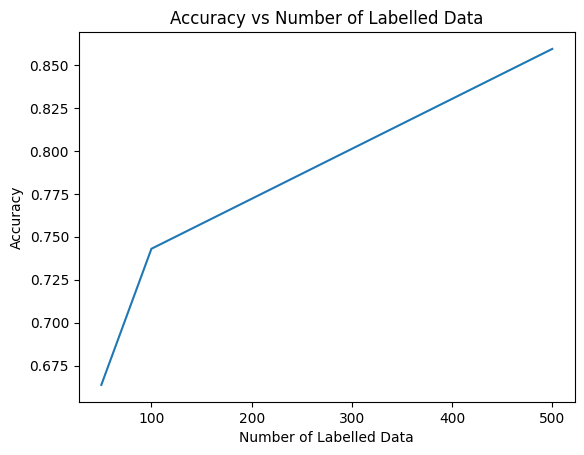

In [48]:
print(accuracy_values)

# Plotting the graph
plt.plot(x_values, accuracy_values)

plt.xlabel('Number of Labelled Data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Labelled Data')

plt.show()

[7. 2. 1. ... 4. 5. 6.]
Accuracy for 1 neighbors: 0.8935
[7. 2. 1. ... 4. 5. 6.]
Accuracy for 2 neighbors: 0.8946
[7. 2. 1. ... 9. 5. 6.]
Accuracy for 3 neighbors: 0.8975
[7. 2. 1. ... 4. 5. 6.]
Accuracy for 4 neighbors: 0.9087
[7. 2. 1. ... 4. 5. 6.]
Accuracy for 5 neighbors: 0.8933


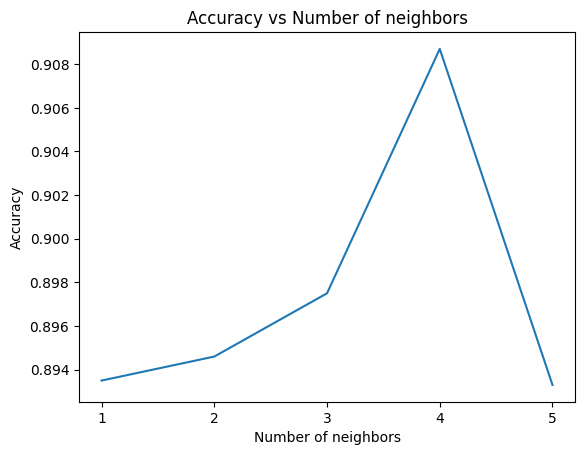

In [46]:
accuracy_values = []
number_of_neighbors = [1, 2, 3, 4, 5]

for neighbors in number_of_neighbors:
    X_train, y_train = supervised_samples(X_full, y_full, 1000, 10) #1000 samples

    model = Model_with_weights(X_train, y_train, k=neighbors)
    accuracy = model.calculate_accuracy(X_test, y_test)
    accuracy_values.append(accuracy)

    print(f"Accuracy for {neighbors} neighbors: {accuracy}")

# Plotting the graph
plt.plot(number_of_neighbors, accuracy_values)

plt.xlabel('Number of neighbors',)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of neighbors')
plt.xticks(np.arange(min(number_of_neighbors), max(number_of_neighbors) + 1, 1.0))

plt.show()

In [ ]:
# y_pred = y_pred.astype(np.int32)
# y_test = y_test.astype(np.int32)

# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
# plt.title("KNN Confusion Matrix")
# plt.show()

# model_with_weights = Model_with_weights(X_train, y_train)
# weighted_accuracy = model_with_weights.calculate_accuracy(X_test, y_test)
# weighted_accuracy_values.append(weighted_accuracy)

In [ ]:
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
#Saving the model

accuracy_values = []
x_values = [50, 100, 500]

for x in x_values:
    if x == 'full':
        X_train, y_train = X_full, y_full
    else:
        X_train, y_train = supervised_samples(X_full, y_full, x, 10)

    model = Model(X_train, y_train)

    with open(f'KNN/DOODLE/_{x}.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    accuracy = model.calculate_accuracy(X_test, y_test)
    accuracy_values.append(accuracy)